# Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')

# Clean Code
## Function and Results

# 01 Data import, Features name cleaning and first exploration

In [125]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

In [126]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


AGE  OVERALL  BEST_OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH    VALUE  \
13014   21       60            61         71    6.00     154      11   350000   
5801    25       76            78         81    6.30     194       5  9000000   
10835   26       69            69         72    5.80     152       3  1100000   
6441    25       64            66         68    5.50     132       4   575000   
11801   20       60            63         72    5.90     137      12   375000   
14366   18       58            60         75    5.70     146      17   275000   
8659    22       61            65         70    5.80     165       9   375000   
10142   21       63            62         73    6.60     172      10   450000   
8148    23       68            69         74    5.11     168       6  1200000   
7799    24       66            71         71    5.10     157       5   850000   

        WAGE  RELEASE_CLAUSE  ATTACKING  CROSSING  FINISHING  \
13014   1000               0        253        57         49   
5801   35000        16000000        304        52         50   
10835   5000         1800000        247        58         37   
6441    3000         1000000        261        54         57   
11801   1000          731000        259        57         52   
14366   3000          694000        250        43         60   
8659    2000          731000        246        54         39   
10142   2000         1000000         74        12         12   
8148    5000         2000000        317        66         63   
7799    2000         1600000        274        44         54   

       HEADING_ACCURACY  SHORT_PASSING  VOLLEYS  SKILL  DRIBBLING  CURVE  \
13014                39             56     52.0    283         66   57.0   
5801                 80             74     48.0    284         70   43.0   
10835                61             65     26.0    247         55   44.0   
6441                 37             63     50.0    316         66   60.0   
11801                49             61     40.0    266         61   42.0   
14366                43             51     53.0    286         64   59.0   
8659                 53             64     36.0    270         59   35.0   
10142                14             23     13.0     79         11   14.0   
8148                 55             68     65.0    316         72   67.0   
7799                 61             68     47.0    275         62   45.0   

       FREE_KICK_ACCURACY  LONG_PASSING  BALL_CONTROL  MOVEMENT  ACCELERATION  \
13014                  46            52            62       335            70   
5801                   35            67            69       354            78   
10835                  26            59            63       373            82   
6441                   66            58            66       390            81   
11801                  44            59            60       340            72   
14366                  50            50            63       345            74   
8659                   55            61            60       369            74   
10142                  11            29            14       171            25   
8148                   61            51            65       355            76   
7799                   37            62            69       368            78   

       SPRINT_SPEED  AGILITY  REACTIONS  BALANCE  POWER  SHOT_POWER  JUMPING  \
13014            74     69.0         49     73.0    240          42     40.0   
5801             73     68.0         73     62.0    333          63     66.0   
10835            75     71.0         65     80.0    267          36     72.0   
6441             69     90.0         58     92.0    299          62     81.0   
11801            72     70.0         55     71.0    308          57     69.0   
14366            69     76.0         51     75.0    255          57     58.0   
8659             68     80.0         64     83.0    307          54     67.0   
10142            26     33.0         62  

# 02 Exploration
## Here I separate numerical and categorical features. 
- df_numeric
- df_object
### The next step is to show results for Categorical and Numerical features

In [127]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 

#Drop ID
#df_numeric.drop(columns='ID')#Why not working?????????????????????????????????????????????????
#df_numeric.sample(2)

#### Categorical features

In [128]:
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  ID  has  17125  categories 
 The single values are:  ['2' '16' '27' ... '259091' '259101' '259105']
Here the detail: 
 2         1
239575    1
239523    1
239529    1
239540    1
         ..
212513    1
212516    1
212518    1
212519    1
259105    1
Name: ID, Length: 17125, dtype: int64



This feature  NAME  has  16176  categories 
 The single values are:  ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Here the detail: 
 J. Rodríguez       10
A. Traoré           8
J. Rojas            8
J. Jones            7
Paulinho            7
                   ..
F. Ondoa            1
K. Opare            1
T. Abe              1
N. Stark            1
Pablo Rodríguez     1
Name: NAME, Length: 16176, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina'

AttributeError: 'DataFrame' object has no attribute 'unique'

#### Numerical features

#### Histograms

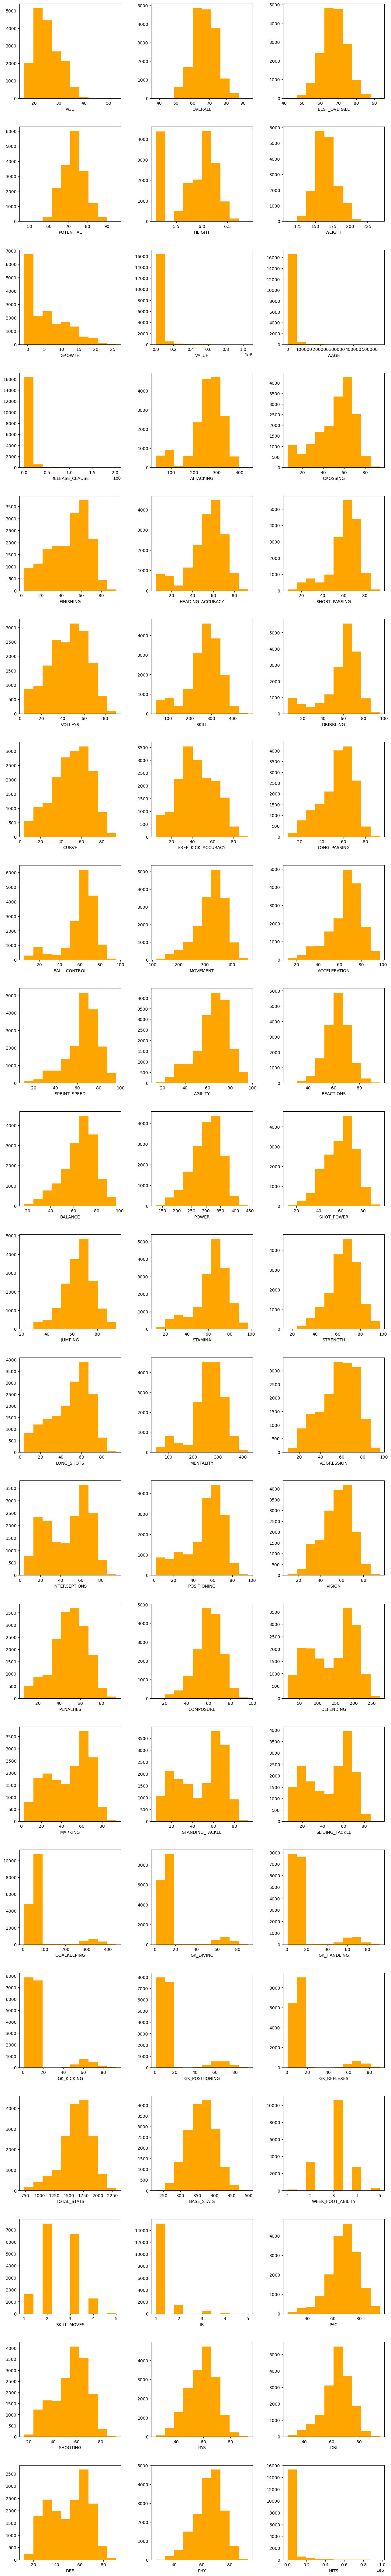

In [115]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### Distributions

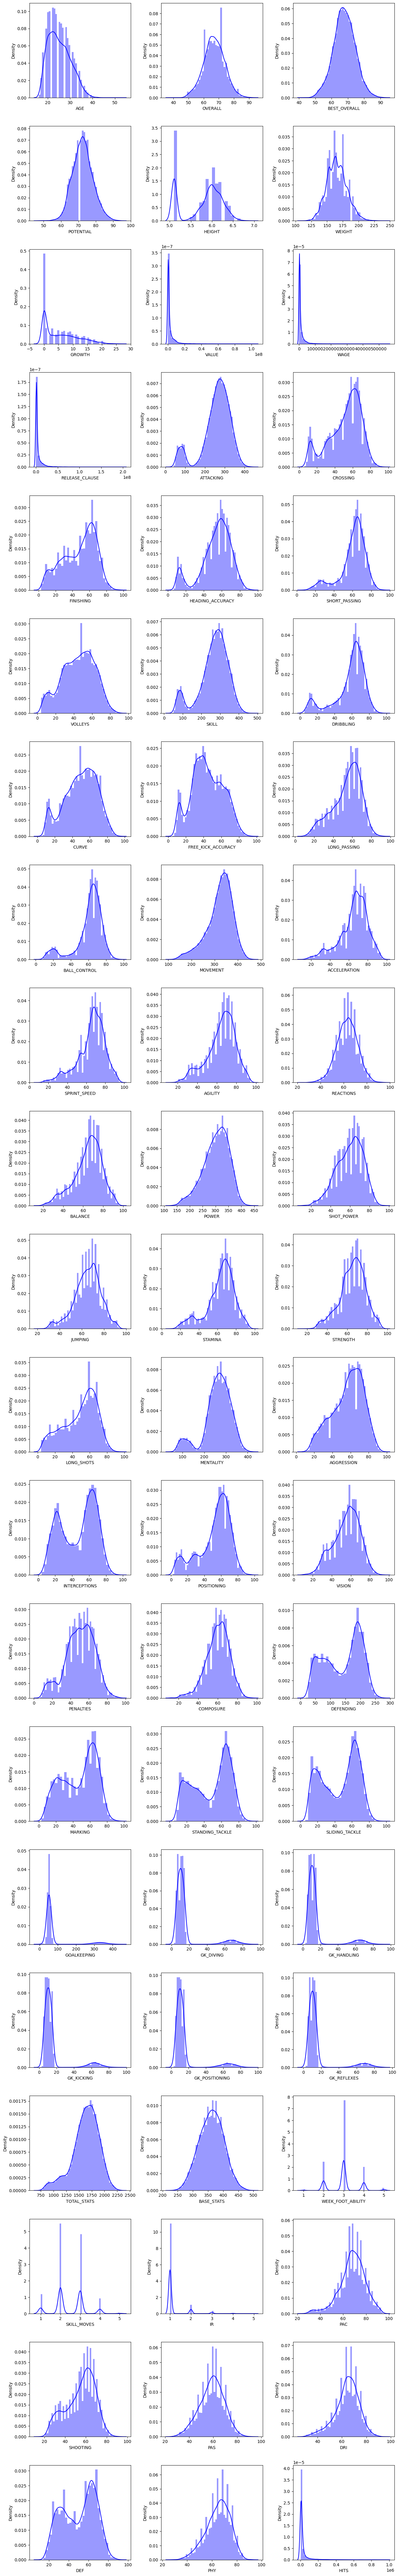

In [129]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### boxplots

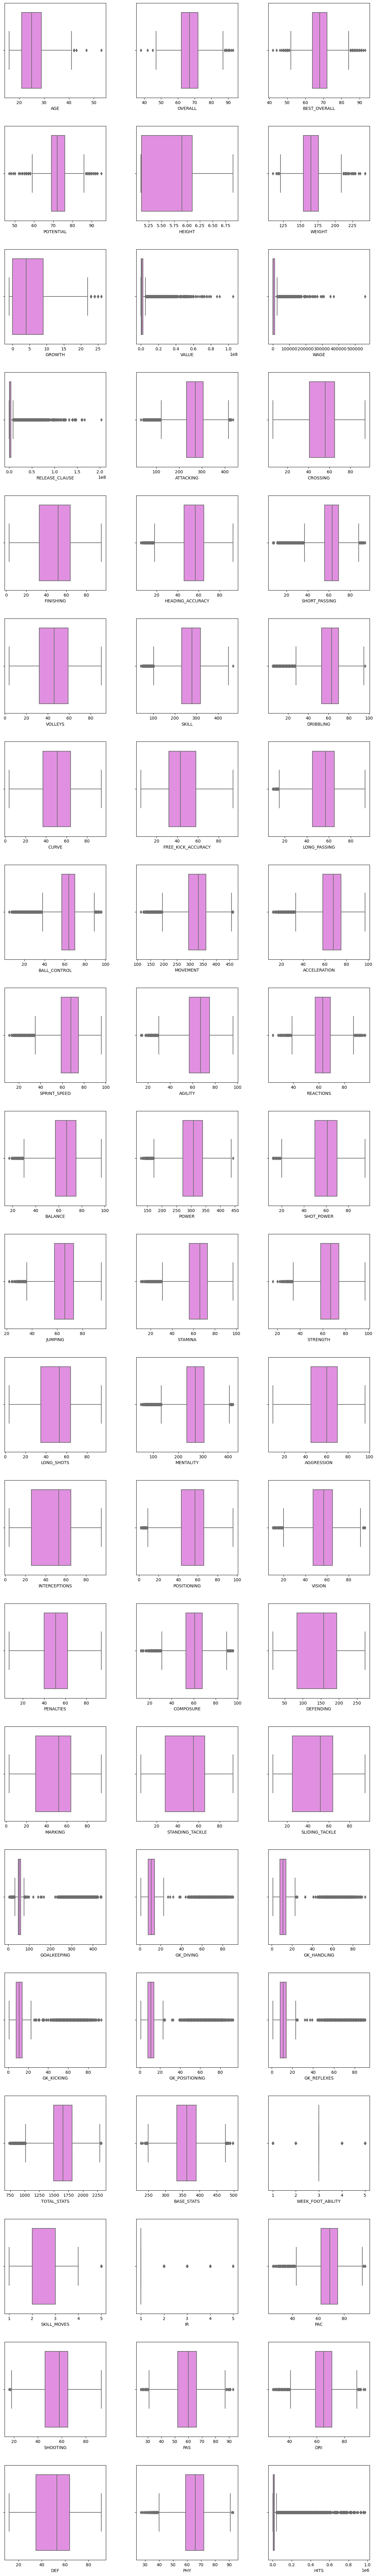

In [117]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [130]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  BEST_OVERALL  | Upper limit:  84.0  | Lower limit:  52.0
Number of exclusions would be  251

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51

Feature name:  VALUE  | Upper limit:  5437500.0  | Lower limit:  -2662500.0
Number of exclusions would be  2304

Feature name:  WAGE  | Upper limit:  26000.0  | Lower limit:  -14000.0
Number of exclusions would be  1751

Feature name:  RELEASE_CLAUSE  | U

#### Correlations

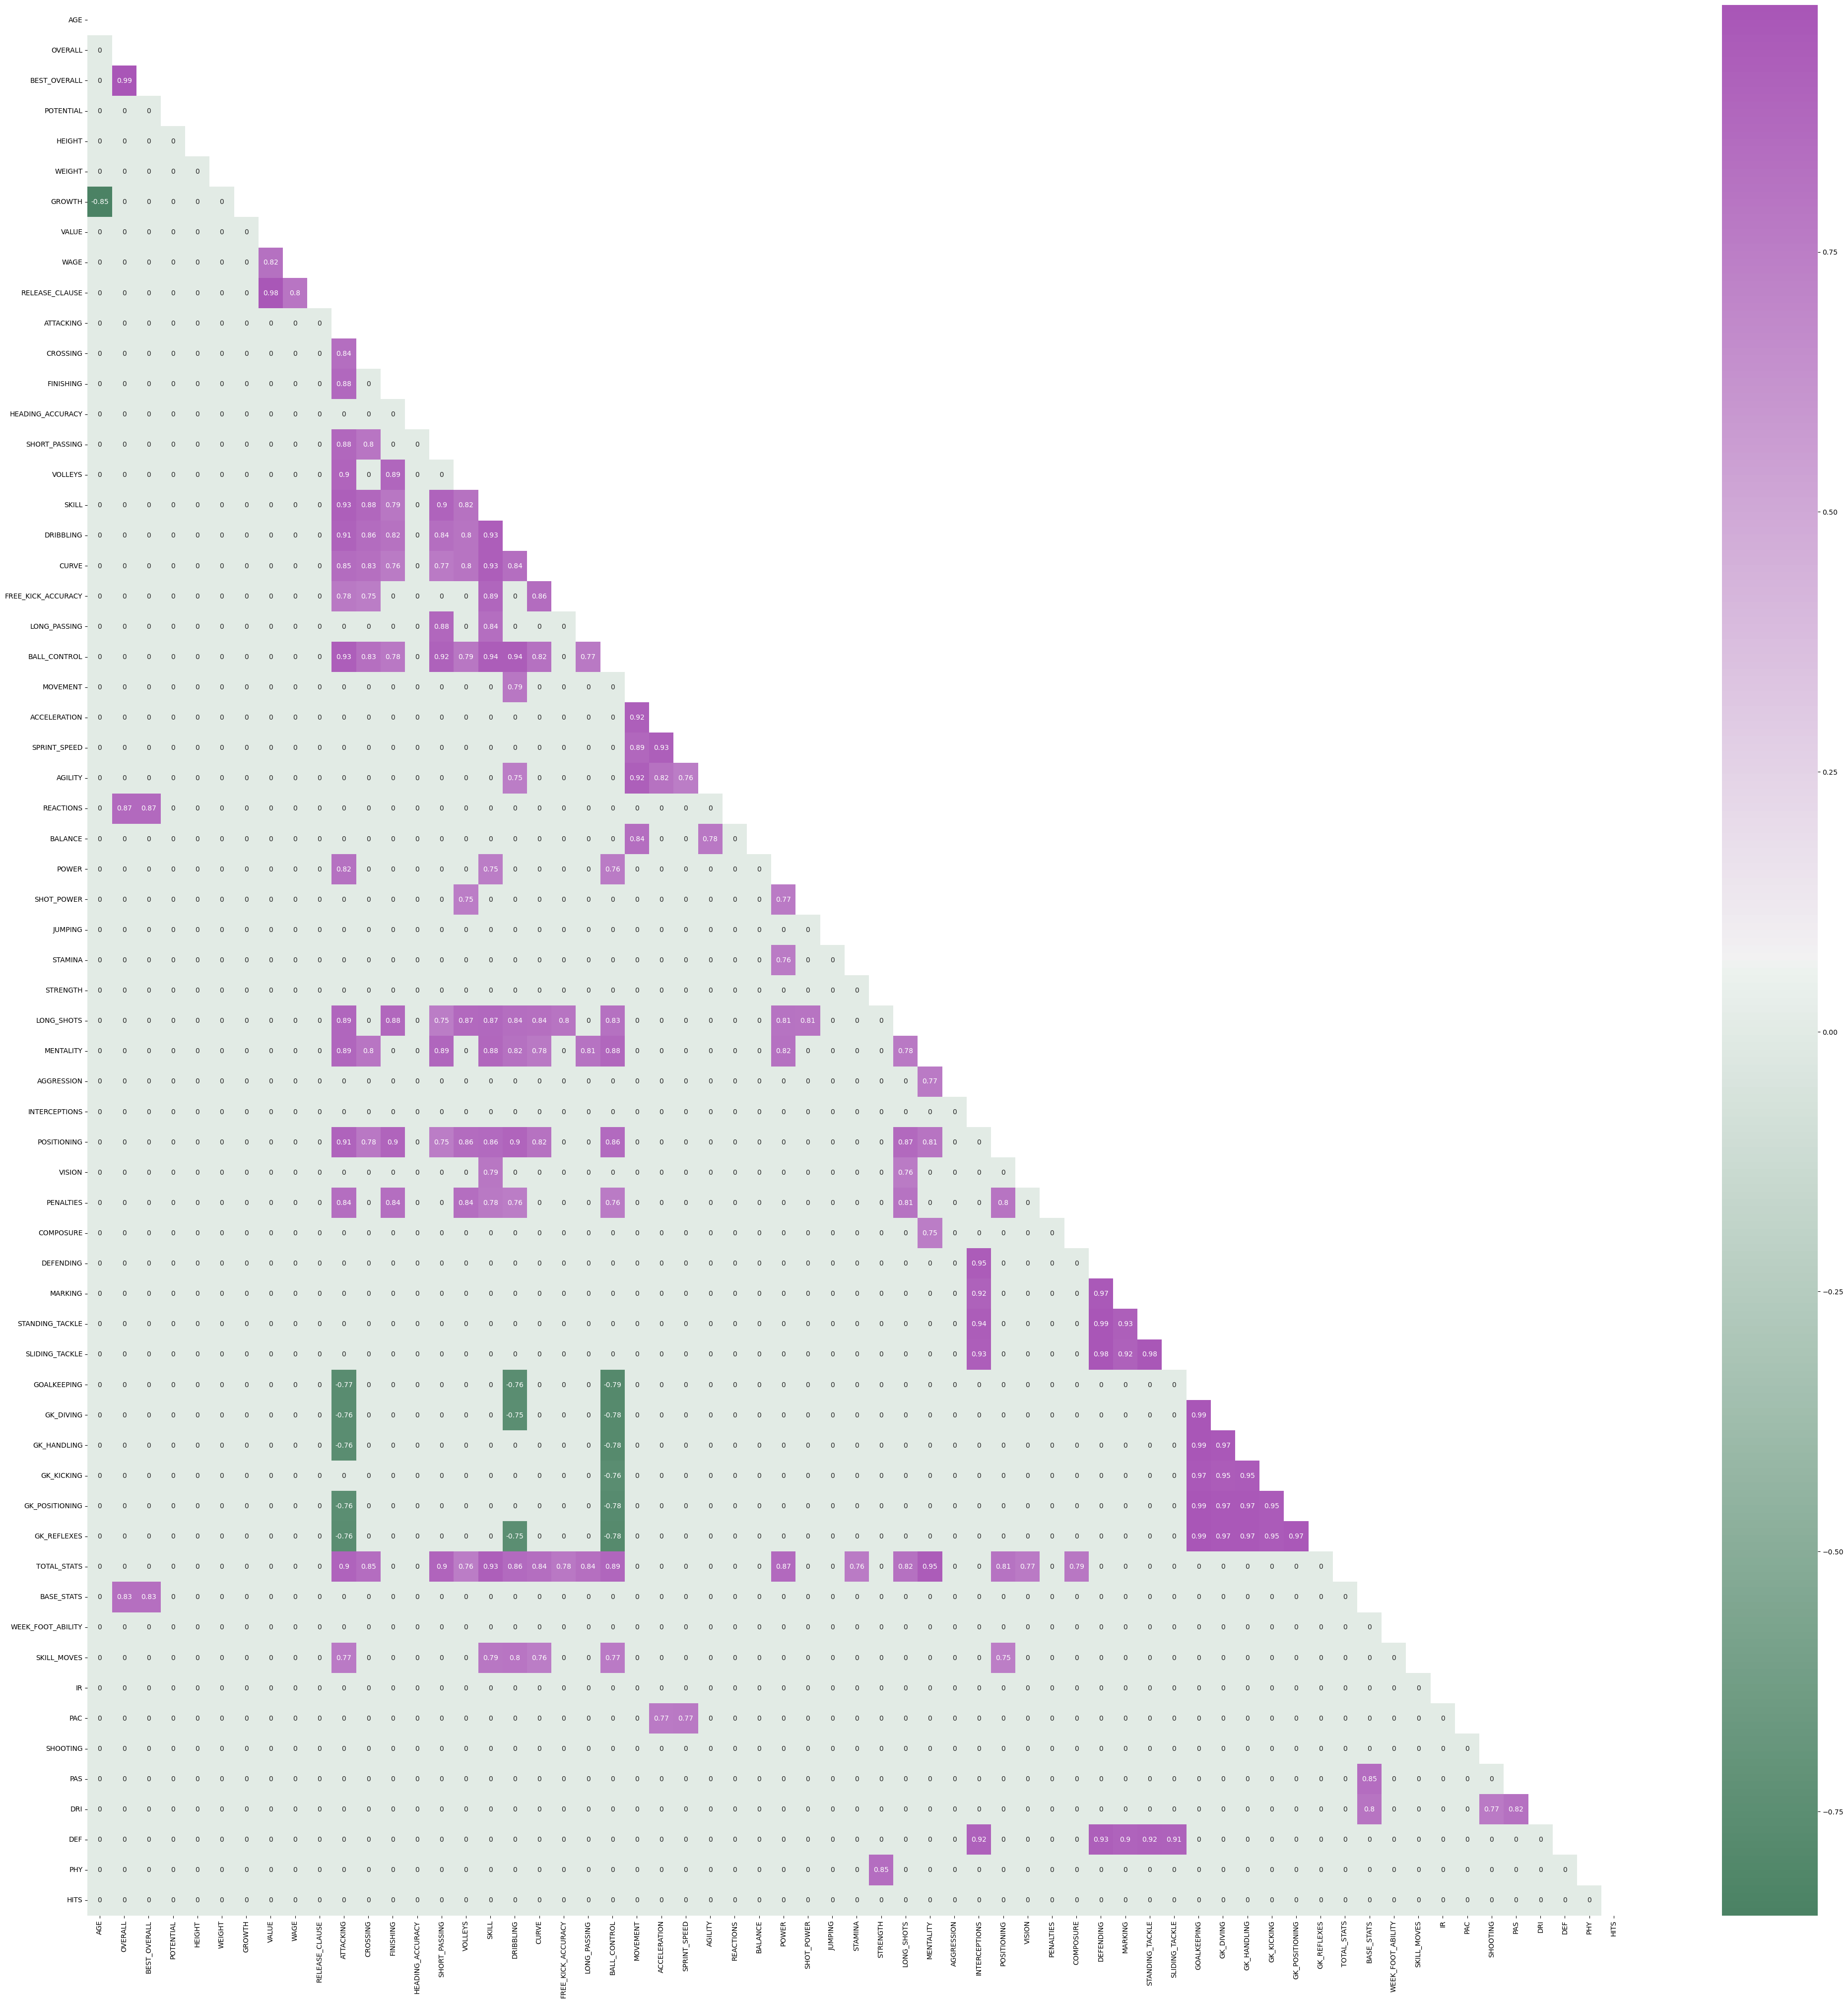

In [131]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 50))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

## Select variables relevant for the model
### Categoricals
    -NATIONALITY
    -BEST_POSITION
    -POTENTIAL
    -
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -WAGE
    -IR


In [132]:
df_object_selected=df_object[['ID','NATIONALITY','BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','WAGE','IR','POTENTIAL','HEIGHT','WEIGHT']]
df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
df_MODEL.reset_index()
df_MODEL.shape

(17125, 12)

#### Check unique values in Selected Categorical features
    We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

In [133]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  ID  has  17125  categories 
 The single values are:  ['2' '16' '27' ... '259091' '259101' '259105']
Here the detail: 
 2         1
239575    1
239523    1
239529    1
239540    1
         ..
212513    1
212516    1
212518    1
212519    1
259105    1
Name: ID, Length: 17125, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Tunisia'
 'Bulgaria' 'Poland' 'United States' 'Mali' 'Finland' 'Iceland'
 'Czech Republic' 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel'
 'Cameroon' 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Aus

#### Check  values in Selected Numerical features
    We need to test which distribution the variables has and in decide the transformation we use. 
    We should remove fetautures with a strong correlation for a linear regression
    In case of a logaritmit regression we don´t need to transform variables

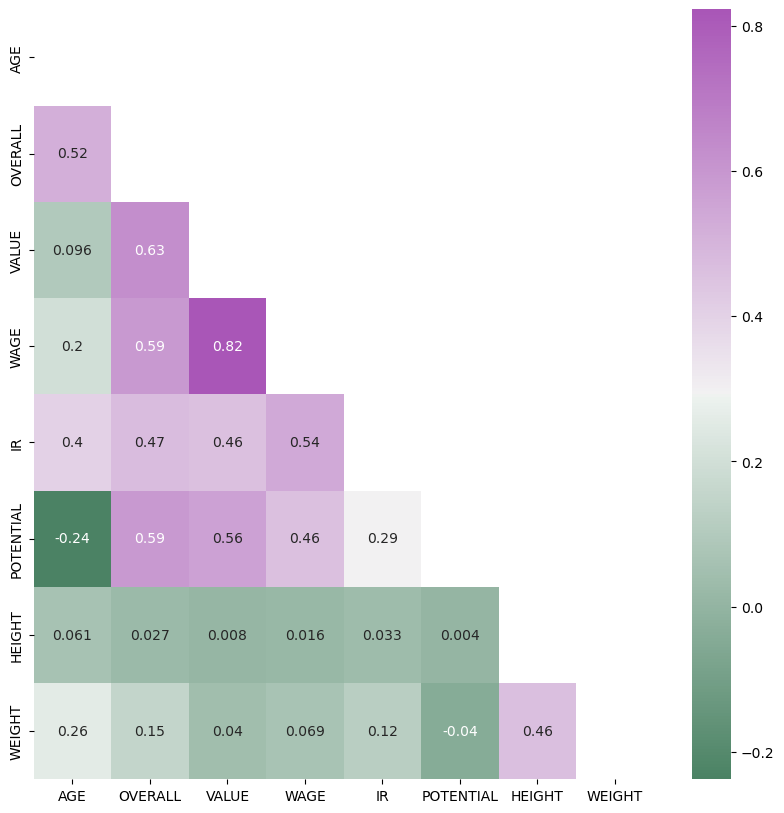

In [134]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

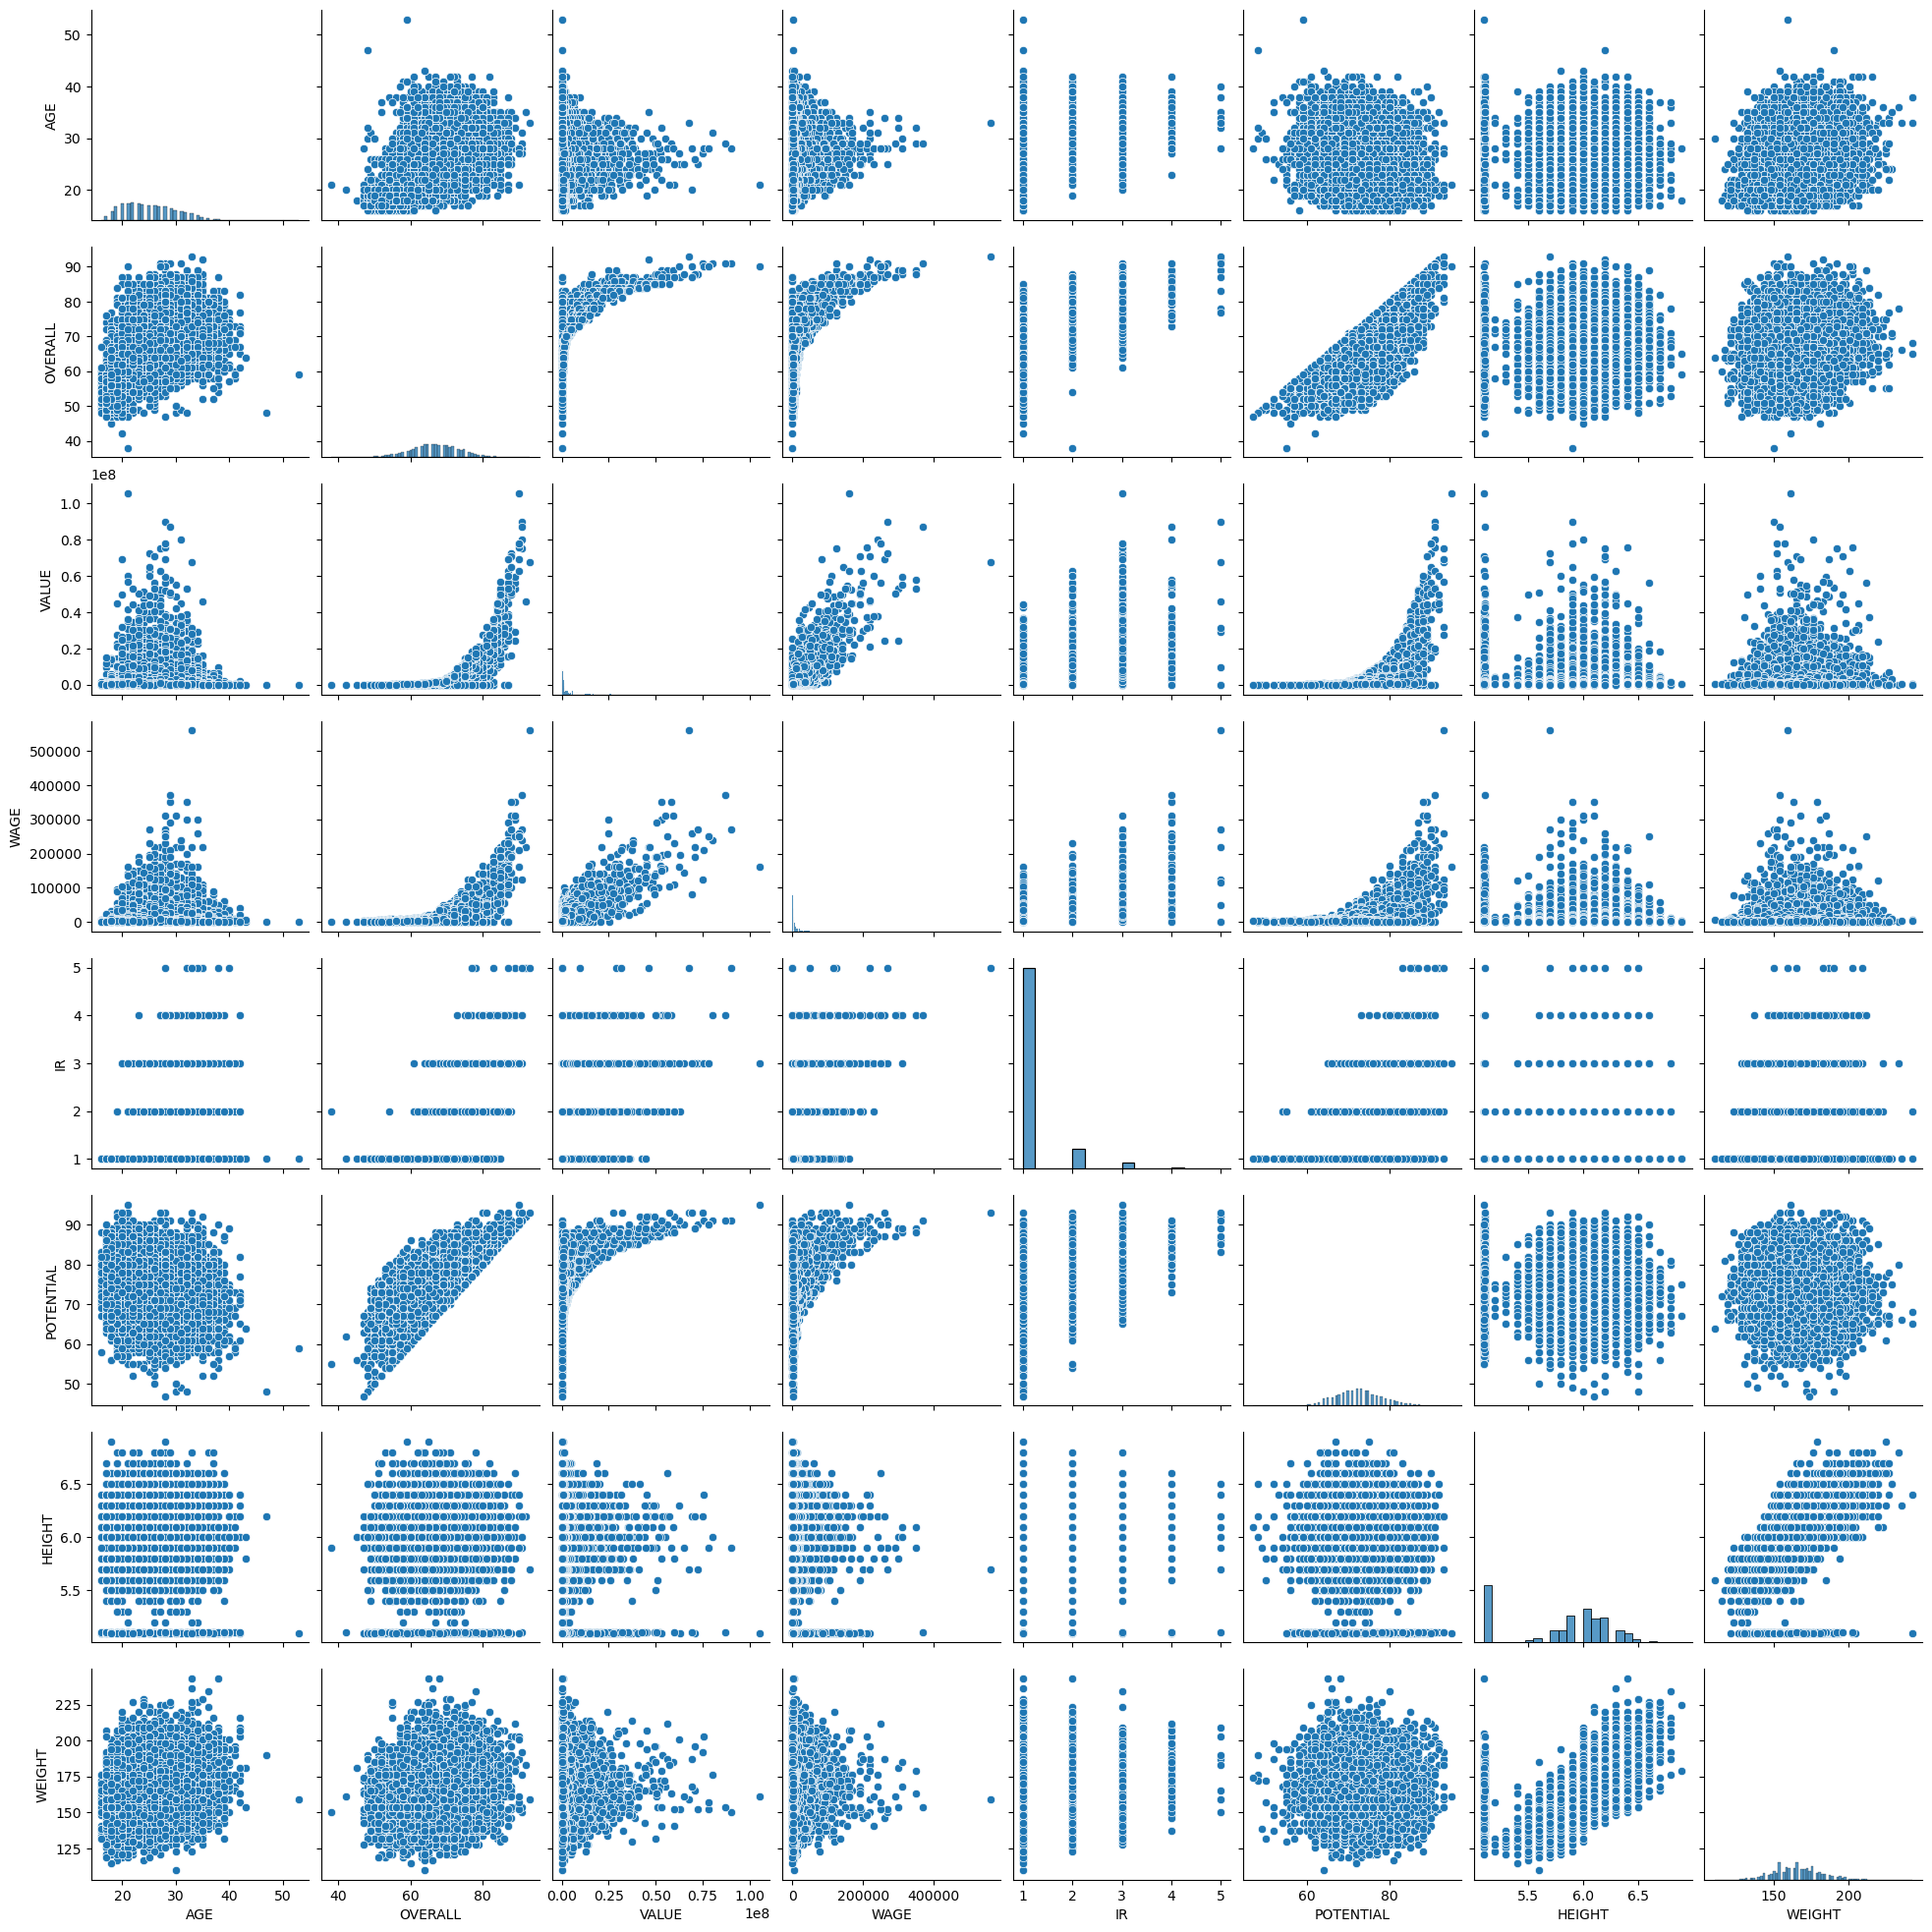

In [135]:
sns.pairplot(df_numeric_selected)

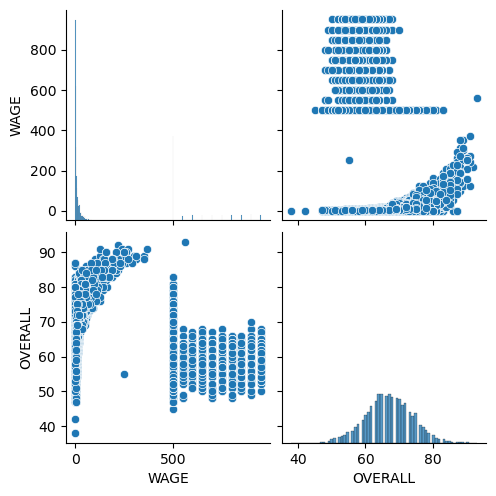

In [36]:
a=df_numeric_selected[["WAGE","OVERALL"]]
sns.pairplot(a)

In [31]:
df_numeric_selected[["WAGE"]>5000].sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# 03 Process / Transformations